## Functional connectivity

This notebook extracts individual connectivity matrices of the networks defined in the parcellation atlases. The connectivity matrices are of shape $N_{\text{subjects}} \times N_{\text{regions}} \times N_{\text{regions}}$.

Load the time-series of the cognitive control network:

## Fit connectivity matrices


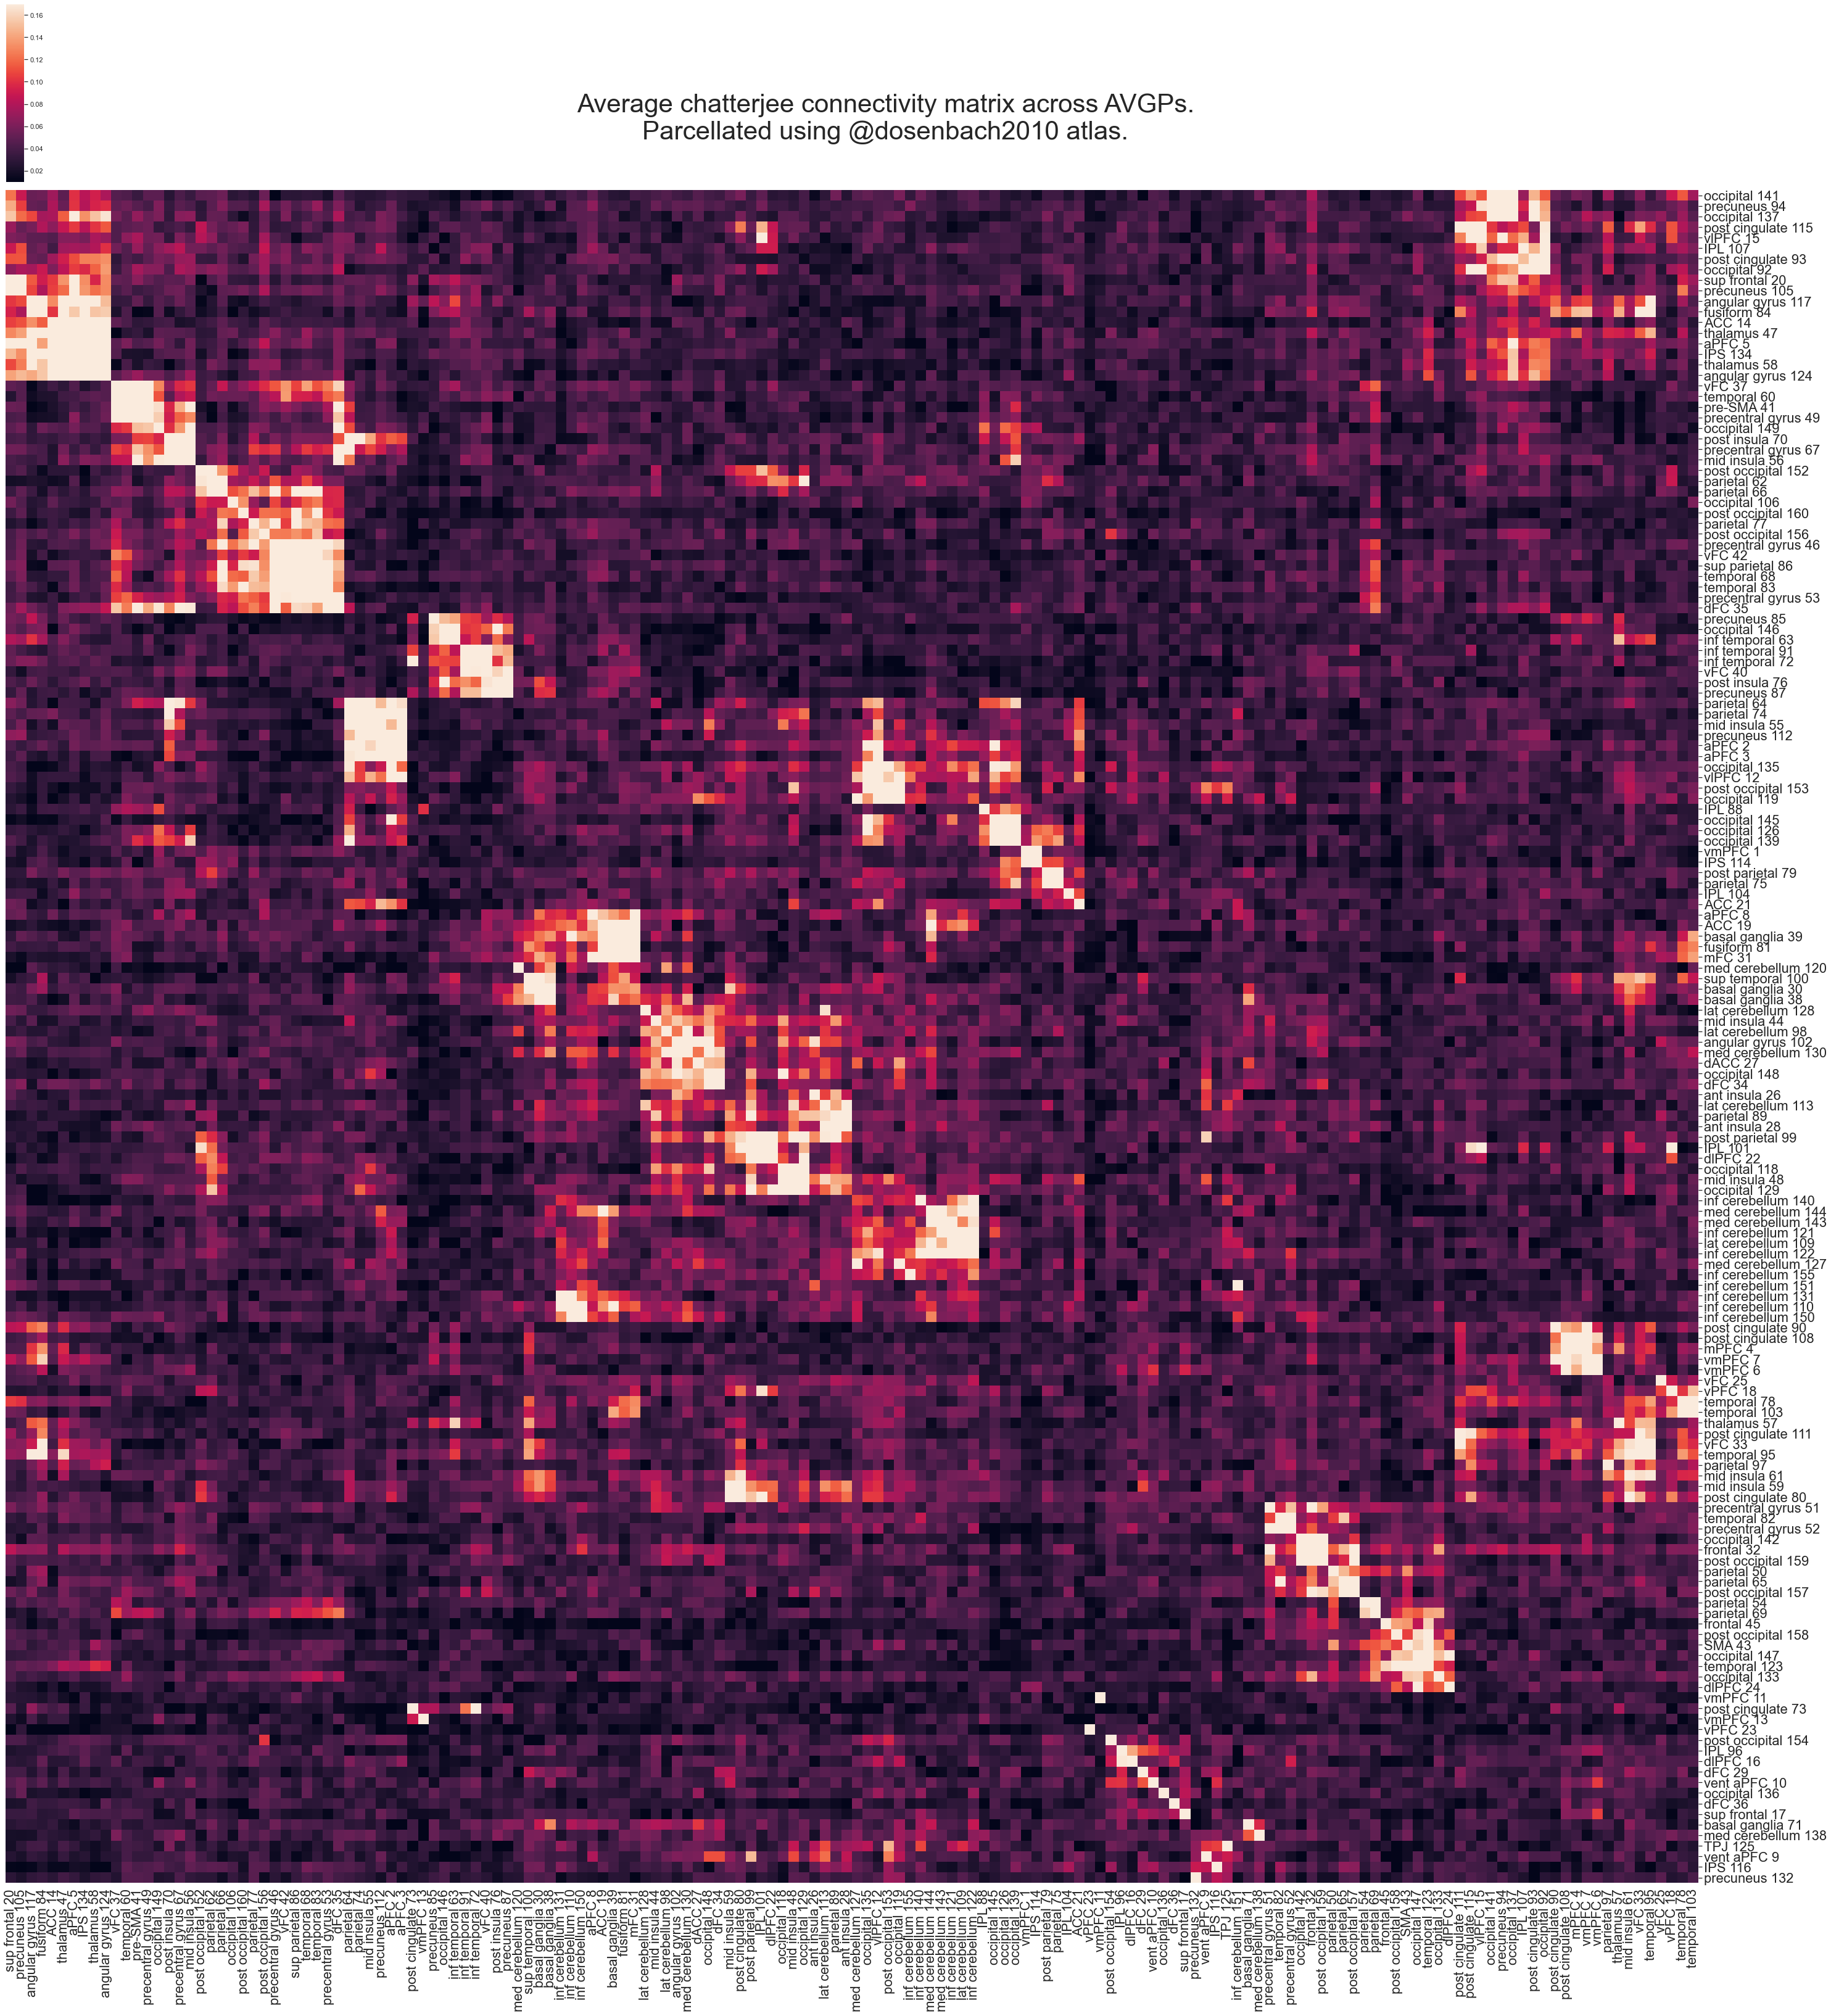

In [23]:
# DEBUG /start
# chatterjee connectivity

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# X = DATASETS['dosenbach2010']['timeseries'].values
# X = [x.transpose(1,0) for x in X]
# conn = ExtraConnectivityMeasure(kind='chatterjee').fit_transform(X)

dataset = xr.load_dataset('data/julia2018_resting/connectivity_dosenbach2010.nc').load()
valid_subjects = ~np.isnan(dataset['inverse_efficiency_score_ms'])
# valid_subjects = valid_subjects & (dataset['group'].values == 'NVGP')

regions = labels=dataset['region'].values

conn = dataset['chatterjee_connectivity'].values
conn = conn[valid_subjects]

mean_conn = pd.DataFrame(conn.mean(0), index=regions, columns=regions)


g = sns.clustermap(
  mean_conn,
  dendrogram_ratio=.00001,
  robust=True,
  cbar_pos=(0.005, 1.0, .01, .1),
  figsize=(40,40))

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 22)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 22)

plt.suptitle('Average chatterjee connectivity matrix across AVGPs.\n'
             'Parcellated using @dosenbach2010 atlas.', y=1.05, fontsize=42)
plt.show()

# DEBUG /end